In [19]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [20]:
data = pd.read_csv('User_Data.csv')
print(data)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


In [21]:
label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

In [22]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
def calc_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

In [25]:
def k_nearest_neighbors(train_features, train_labels, test_features, k):
    preds = []
    for test_instance in test_features:
        distances = [calc_distance(test_instance, train_instance) for train_instance in train_features]
        nearest_indices = np.argsort(distances)[:k]
        nearest_labels = [train_labels[i] for i in nearest_indices]
        most_common = Counter(nearest_labels).most_common(1)
        preds.append(most_common[0][0])
    return preds

In [26]:
def test_knn(k_list):
    accuracy_results = []
    for k in k_list:
        y_predictions = k_nearest_neighbors(X_train, y_train, X_test, k)
        acc = accuracy_score(y_test, y_predictions)
        accuracy_results.append(acc)
        print(f"K={k}, Accuracy={acc * 100:.2f}%")
    return accuracy_results

In [27]:
k_list = range(1, 21)

In [28]:
acc_list = test_knn(k_list)

K=1, Accuracy=62.50%
K=2, Accuracy=62.50%
K=3, Accuracy=71.25%
K=4, Accuracy=67.50%
K=5, Accuracy=72.50%
K=6, Accuracy=73.75%
K=7, Accuracy=73.75%
K=8, Accuracy=73.75%
K=9, Accuracy=75.00%
K=10, Accuracy=75.00%
K=11, Accuracy=73.75%
K=12, Accuracy=73.75%
K=13, Accuracy=72.50%
K=14, Accuracy=72.50%
K=15, Accuracy=72.50%
K=16, Accuracy=72.50%
K=17, Accuracy=72.50%
K=18, Accuracy=72.50%
K=19, Accuracy=72.50%
K=20, Accuracy=72.50%


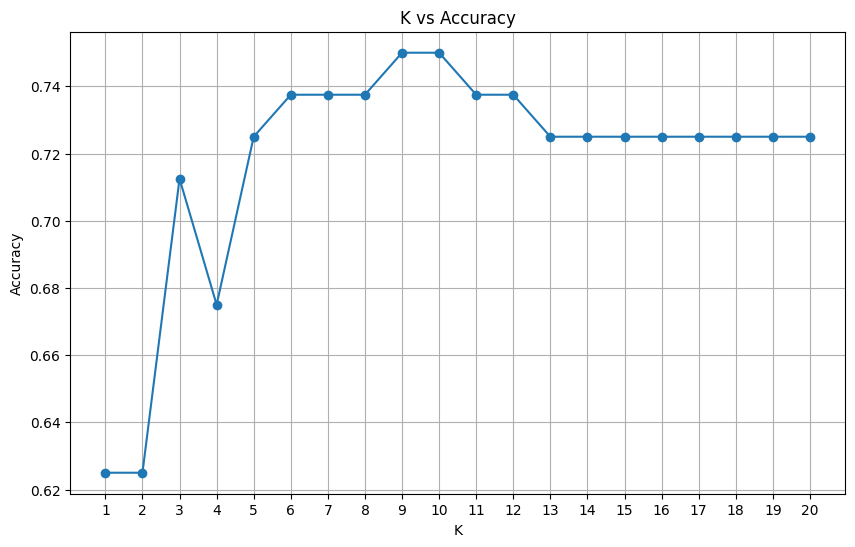

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(k_list, acc_list, marker='o')
plt.title("K vs Accuracy")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.xticks(k_list)
plt.grid(True)
plt.show()

In [30]:
optimal_k = k_list[np.argmax(acc_list)]
y_pred_optimal_k = k_nearest_neighbors(X_train, y_train, X_test, optimal_k)
conf_matrix = confusion_matrix(y_test, y_pred_optimal_k)
best_accuracy = accuracy_score(y_test, y_pred_optimal_k)

In [31]:
conf_matrix, best_accuracy, optimal_k

(array([[47,  5],
        [15, 13]]),
 0.75,
 9)